### Arrays

arrays是numpy中的数组类型，某一个arrays中的所有元素的数据类型必须是相同的

arrays的索引和常见的数组类似

arrays还有维数dimensions和形状shape的概念，dimensions是嵌套的层数，shape则是一个整数元组表示每一个dimension的size

In [1]:
import numpy as np # 导入numpy

#### **一些创建arrays的方式**
- 由数组创建
- `np.zeros`和`np.ones`创建指定形状全0或全1 arrays
- `np.full`创建指定形状的用某个数填充的arrays
- `np.eye`创建n维的单位矩阵
- `np.random.random`随机数矩阵

In [2]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [3]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [4]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [5]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [6]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.66767551 0.81102885]
 [0.78171939 0.05546251]]


#### **Arrays的索引访问与切片**
- 可以通过`[INT,INT]`的方式直接访问某一个元素
- 使用`[:,:]`对Arrays进行切片，注意要对每一个维度都进行切片操作

In [7]:
import numpy as np
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


注意，切片得到的新Arrays是对原始Arrays的引用，因此修改切片得到的arrays会导致原arrays中数据的改动

In [8]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) 

2
77


In [9]:
# 注意这三种切片方式得到的结果有所不同
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


也可以使用整数list的方式对arrays进行切片

In [10]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


我们可以通过整数列表切片的方式，方便的提取或者修改一个arrays中的某些特定元素

In [11]:
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)
# Create an array of indices
b = np.array([0, 2, 0, 1])
# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


bool类型的arrays也可以作为索引从arrays中提取元素，会返回一个一维的arrays

In [12]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


#### **Arrays的数据类型**

在numpy的Arrays中，每个元素的数据类型必须是相同的；

在用list创建Arrays时，numpy会猜测一个合理的数据类型

我们也可以使用`dtype=`的参数指定数据类型

In [13]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


#### **numpy中的数学运算**

In [14]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [15]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [16]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [17]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [18]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


对于矩阵的点乘和矩阵乘法运算，我们通过`dot`方法和`@`来实现

In [19]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


In [20]:
print(v @ w)

219


In [21]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


numpy中还内置了许多常见的数学函数，可以参考[文档](http://docs.scipy.org/doc/numpy/reference/routines.math.html)

#### **广播机制**

广播机制可以将不同大小的arrays进行操作

比如我们想在某个矩阵的每一行中加上一个向量，通常的做法是这样的

In [22]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


这样的循环在处理大的数据时是十分低效的，另一种方法是

In [23]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)   
y = x + vv  # Add x and vv elementwise
print(y)

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


但是高效的广播机制允许我们直接将他们进行相加

In [24]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


**总结：广播的核心逻辑**
- 当两个数组的维度数量不同时，NumPy 会自动为维度较少的数组前面（左侧）补 1，直到两个数组的维度数量相同；
- 再检查各维度是否满足 “相等或其中一个为 1”；
- 满足则拉伸维度为 1 的轴，最终结果形状为各维度最大值。

#### **Matplotlib**

Matplotlib是一个绘图工具，下来介绍`matplotlib.pyplot`模块

In [25]:
import matplotlib.pyplot as plt

plotting是matplotlib中最重要的功能，其可以用来绘制二维数据表格

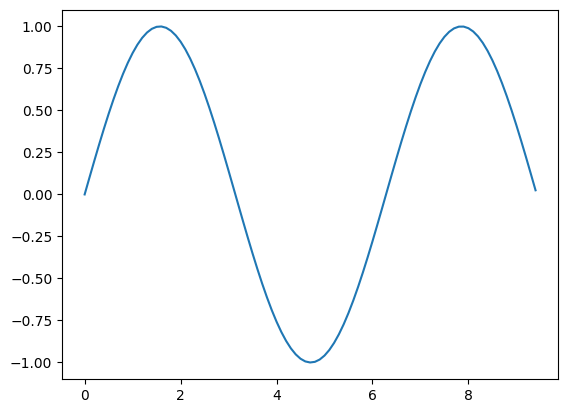

In [26]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

我们可以在同一个图上绘制不同的函数，并加上标题和标签

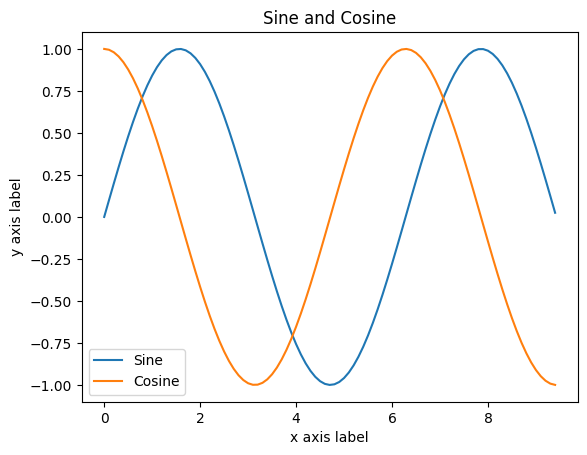

In [27]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

我们也可以绘制不同的子图，将数据分别呈现

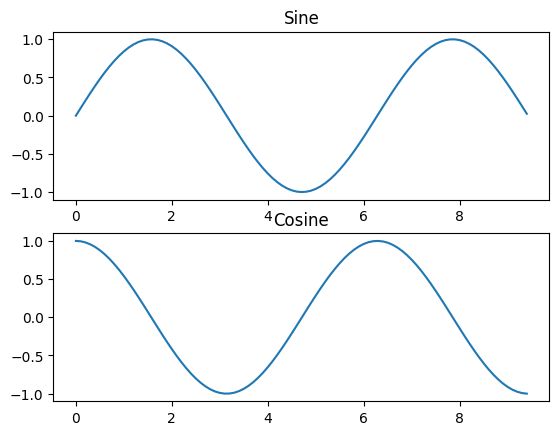

In [28]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()